In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
df = pd.read_excel(r'E:\Data Science\Assignment1\loan.xlsx')
df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [ ]:
le_Sex = LabelEncoder()
le_Res_status = LabelEncoder()
le_Telephone = LabelEncoder()
le_Occupation = LabelEncoder()
le_Job_status = LabelEncoder()
le_Liab_ref = LabelEncoder()
le_Acc_ref = LabelEncoder()
le_Decision = LabelEncoder()

In [ ]:
df['Sex_n'] = le_Sex.fit_transform(df['Sex'])
df['Res_status_n'] = le_Res_status.fit_transform(df['Res_status'])
df['Telephone_n'] = le_Telephone.fit_transform(df['Telephone'])
df['Occupation_n'] = le_Occupation.fit_transform(df['Occupation'])
df['Job_status_n'] = le_Job_status.fit_transform(df['Job_status'])
df['Liab_ref_n'] = le_Liab_ref.fit_transform(df['Liab_ref'])
df['Acc_ref_n'] = le_Acc_ref.fit_transform(df['Acc_ref'])
df['Decision_n'] = le_Acc_ref.fit_transform(df['Decision'])
df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,...,Balance,Decision,Sex_n,Res_status_n,Telephone_n,Occupation_n,Job_status_n,Liab_ref_n,Acc_ref_n,Decision_n
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,...,0,reject,1,0,0,11,6,0,0,1
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,...,0,reject,1,1,1,4,0,1,0,1
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,...,2200,accept,0,0,0,0,2,0,0,0
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,...,0,accept,1,1,1,0,0,0,0,0
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,...,0,reject,1,0,0,1,0,0,0,1


In [ ]:
data = df.drop(['Sex','Res_status','Telephone','Occupation','Job_status','Liab_ref','Acc_ref'],axis="columns")
data

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Decision,Sex_n,Res_status_n,Telephone_n,Occupation_n,Job_status_n,Liab_ref_n,Acc_ref_n,Decision_n
0,50.750000,0.585,0,0,145,0,reject,1,0,0,11,6,0,0,1
1,19.670000,10.000,0,0,140,0,reject,1,1,1,4,0,1,0,1
2,52.830002,15.000,5,14,0,2200,accept,0,0,0,0,2,0,0,0
3,22.670000,2.540,2,0,0,0,accept,1,1,1,0,0,0,0,0
4,29.250000,13.000,0,0,228,0,reject,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,34.169998,2.750,2,0,232,200,reject,1,0,0,3,4,1,0,1
425,22.250000,1.250,3,0,280,0,reject,0,1,1,11,6,0,0,1
426,23.330000,1.500,1,0,422,200,accept,1,0,0,0,0,0,0,0
427,21.000000,4.790,2,1,80,300,accept,1,1,1,7,2,1,0,0


In [ ]:
y = data['Decision_n']
x = data[['Age','Time_at_address','Time_employed','Time_bank','Home_Expn','Balance','Sex_n','Res_status_n','Telephone_n','Occupation_n','Job_status_n','Liab_ref_n','Acc_ref_n']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
clf_data = DecisionTreeClassifier(random_state=42)
clf_data = clf_data.fit(x_train,y_train)

In [ ]:
clf_data.score(x_test,y_test)

0.6296296296296297

In [ ]:
y_predicted = clf_data.predict(x_test)

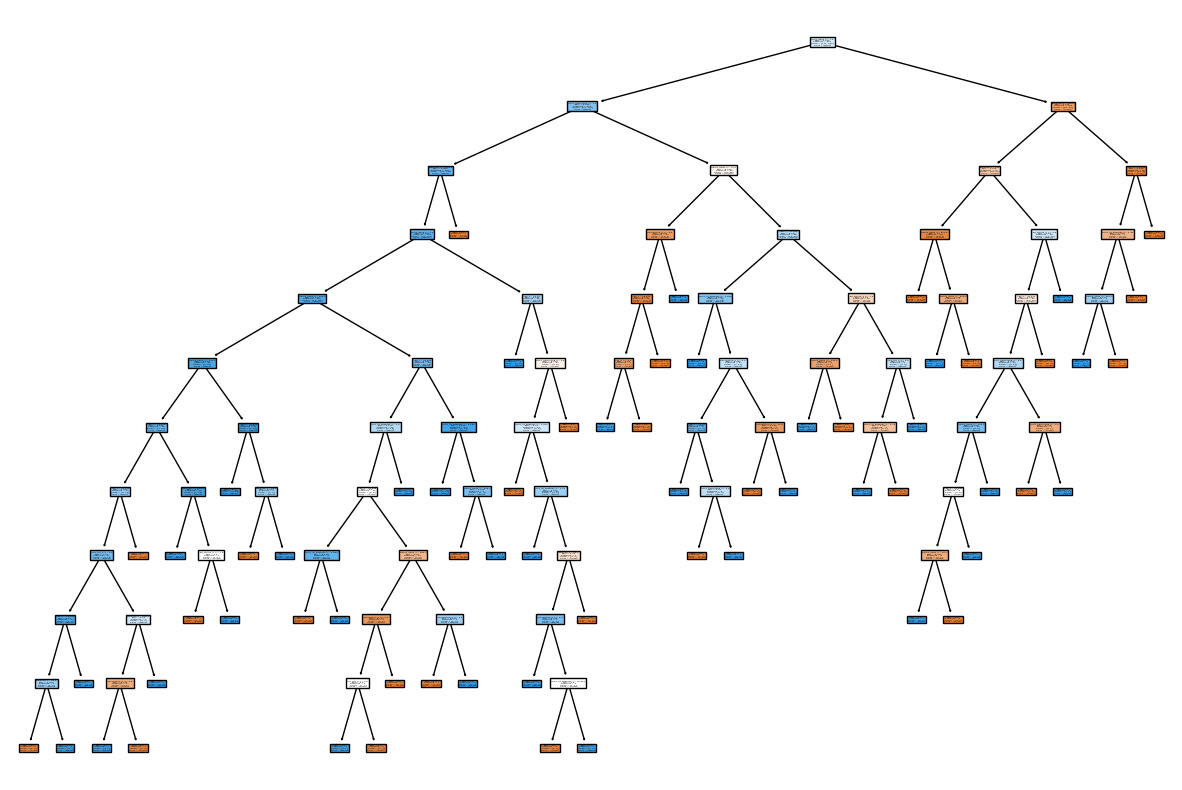

In [ ]:
import graphviz
plt.figure(figsize=(2,10))
plot_tree(clf_data,
          filled=True,
          class_names = ["Accept","Reject"],
          feature_names = x.columns);

C:\Users\parjita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


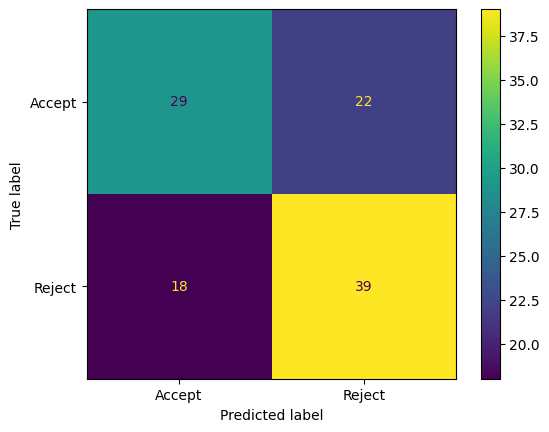

In [ ]:
plot_confusion_matrix(clf_data,x_test,y_test,display_labels=['Accept','Reject'])

[Text(0.6988188976377953, 0.9583333333333334, 'X[3] <= 1.5\ngini = 0.493\nsamples = 321\nvalue = [141, 180]'),
 Text(0.4921259842519685, 0.875, 'X[2] <= 1.5\ngini = 0.386\nsamples = 218\nvalue = [57, 161]'),
 Text(0.3700787401574803, 0.7916666666666666, 'X[5] <= 5150.0\ngini = 0.296\nsamples = 166\nvalue = [30, 136]'),
 Text(0.3543307086614173, 0.7083333333333334, 'X[3] <= 0.5\ngini = 0.269\nsamples = 162\nvalue = [26, 136]'),
 Text(0.25984251968503935, 0.625, 'X[4] <= 256.0\ngini = 0.217\nsamples = 137\nvalue = [17, 120]'),
 Text(0.16535433070866143, 0.5416666666666666, 'X[4] <= 104.0\ngini = 0.149\nsamples = 99\nvalue = [8, 91]'),
 Text(0.12598425196850394, 0.4583333333333333, 'X[0] <= 24.875\ngini = 0.301\nsamples = 38\nvalue = [7, 31]'),
 Text(0.09448818897637795, 0.375, 'X[0] <= 23.125\ngini = 0.432\nsamples = 19\nvalue = [6, 13]'),
 Text(0.07874015748031496, 0.2916666666666667, 'X[11] <= 0.5\ngini = 0.36\nsamples = 17\nvalue = [4, 13]'),
 Text(0.047244094488188976, 0.208333333333

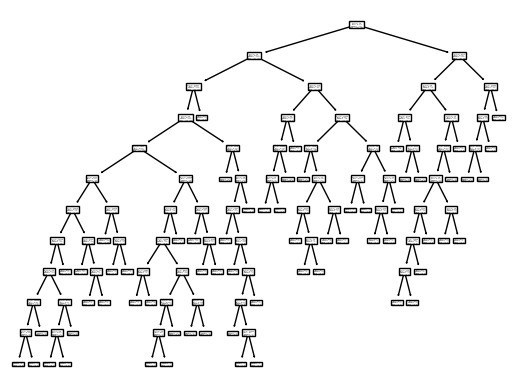

In [ ]:
from sklearn import tree
tree.plot_tree(clf_data)